<a href="https://colab.research.google.com/github/Estefany66/Ciencia-de-Datos/blob/main/Estudio_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify


In [4]:
# Librerías utilizadas

# Librerías para el manejo de directorios
import os
import glob
from pathlib import Path

import numpy as np
import pandas as pd

# Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import squarify

%matplotlib inline

In [13]:
# Importar la librería pandas
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel('/content/drive/MyDrive/DATA OPTICA SAN FRANCISCO /Producto_Stock.xlsx')

# Escribir el archivo Parquet
df.to_parquet('/content/drive/MyDrive/DATA OPTICA SAN FRANCISCO /Producto_Stock.parquet')


In [28]:
# Leer el archivo Excel
df = pd.read_excel('/content/drive/MyDrive/DATA OPTICA SAN FRANCISCO /Producto_Stock.xlsx')

In [29]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con columnas que contienen espacios en blanco.
# Puedes llenar los espacios en blanco con ceros de la siguiente manera:

df.fillna(0, inplace=True)

# El parámetro inplace=True modifica el DataFrame original.
# Si no deseas modificar el DataFrame original, puedes asignar el resultado a una nueva variable:
# df_filled = df.fillna(0)

# Ahora, todos los espacios en blanco en el DataFrame se han llenado con ceros.
# Puedes verificarlo imprimiendo el DataFrame después de la operación.
print(df)


           cod                                           producto  \
0     10005945                              PAÑOS ANTIFOGGING   0   
1     10005945                              PAÑOS ANTIFOGGING   0   
2     10005945                              PAÑOS ANTIFOGGING   0   
3     10005945                              PAÑOS ANTIFOGGING   0   
4     10005945                              PAÑOS ANTIFOGGING   0   
...        ...                                                ...   
5331     51634  ESSILOR EYEZEN BOOST AIRWEAR BLUE UV FILTER SY...   
5332     51635  MON OFT ARO/COMPLETO ADULTO RAZZA 13833 PLASTI...   
5333     51635  MON OFT ARO COMPLETO ADULTO PIAZZA PZV10027 AC...   
5334     51636  MONTURA USADA NO ES RESPONSABILIDAD DE LA EMPR...   
5335     51636                                    POLY AR /CERCA    

                linea  stock fecha_stock  
0     NO ESPECIFICADO    1.0  30/08/2023  
1     NO ESPECIFICADO    1.0  30/08/2023  
2     NO ESPECIFICADO    1.0  30/08/2023  

In [53]:
import pandas as pd

# Lee tu archivo Excel
df = pd.read_excel('/content/drive/MyDrive/DATA OPTICA SAN FRANCISCO /Producto_Venta.xlsx')

# Convierte la columna 'fecha_comp' a str
df['fecha_comp'] = df['fecha_comp'].astype(str)

# Escribe el archivo Parquet
df.to_parquet('/content/drive/MyDrive/DATA OPTICA SAN FRANCISCO /Producto_Venta.parquet')


In [21]:
df['fecha_comp'].dtype

dtype('O')

In [56]:
# Carga de datos
!pip install fastparquet


BASE_DIR = Path.cwd()
BASE_DIR

df_ventas = pd.read_parquet(f"{BASE_DIR / '/content/drive/MyDrive/DATA OPTICA SAN FRANCISCO /Producto_Venta.parquet'}", engine='fastparquet')
df_stock = pd.read_parquet(f"{BASE_DIR / '/content/drive/MyDrive/DATA OPTICA SAN FRANCISCO /Producto_Stock.parquet'}", engine='fastparquet')

df_ventas_linea_prod = df_ventas.query('fecha_comp > "2022-12-01"').loc[:,['fecha_comp', 'cod', 'producto', 'cantidad', 'monto_soles']]
df_ventas_linea_prod = pd.merge(df_ventas_linea_prod, df_stock, on=['cod', 'producto'], how='outer')

In [57]:
# Estilo y colores para los gráficos

plt.style.use('seaborn-colorblind')
plt.rcParams['lines.linewidth'] = 1.5

VERDE = '#39894d'
AZUL = '#2649e8'
AMARILLO = '#f1d065'

# Funciones generales

# Formateado de texto
def formato_titulo(texto):
    subray = '=' * (len(texto))
    print("\033[1;32m"+texto)
    print(subray)
    print("\033[0;m")

<ipython-input-57-05e5a8c5b220>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [58]:
# Funciones para crear gráficos de Altair


# graf_barras_ventas_dol
# Crea un gráfico de barras de ventas en $ en función de diferentes
# intervalos de tiempo
#
# Parámetros:
#     df: DataFrame a utilizar
#     x: Datos para el eje de las x. Generalmente es el intervalo de tiempo
#     tooltip: Lista con los parámetros del tooltip
#     titulo: Título del gráfico
#     dx: Entero para ajustar horizontalmente la posición del texto sobre las barras
def graf_barras_ventas_dol(df, x, tooltip, titulo, dx):


    barras = alt.Chart(df).mark_bar().encode(
                    x=x,
                    y=alt.Y('sum(monto_soles):Q', title = 'Ventas en S/.', scale=alt.Scale(zero=False),
                      axis = alt.Axis(grid=True, titleAnchor='middle', titleAngle = 270, labelFontSize=10)),
                    color=alt.Color(
                        'sum(monto_soles):Q', scale=alt.Scale(scheme='goldgreen'),
                        legend=alt.Legend(title="Ventas en S/.")),
                    tooltip=tooltip,
                    ).properties(title=titulo,
                             width=700,
                             height=300
                    )

    textos = barras.mark_text(dx=dx, dy=-10, fill='black').encode(
             text = alt.Text('sum(monto_soles):Q', format=',.5', title = 'Ventas en S/.')
                    )

    grafico_final = barras + textos

    return grafico_final

# graf_sectores_linea
# Crea un gráfico de sectores de las líneas de productos
#
# Parámetros:
#     df: DataFrame a utilizar
#     theta: Datos que se van a graficar
#     texto: Texto que se mostrará en el cada sector del gráfico
#     titulo: Título del gráfico
def graf_sectores_linea(df, theta, texto, titulo):

    base = alt.Chart(df).encode(
        theta=theta,
        color=alt.Color("linea:N"),
        tooltip=[alt.Tooltip('linea:N', title='Línea de Producto'),
                 alt.Tooltip('sum(monto_soles):Q', format='$,.5', title='Ventas en S/.'),
                 alt.Tooltip('sum(cantidad):Q', format=',.5', title='Volumen de Ventas')]
    ).properties(title=titulo)

    pie = base.mark_arc(outerRadius=130, innerRadius=40)

    text = base.mark_text(radius=110, size=10, fill='black').encode(
           text=texto
           )

    grafico = pie + text

    return grafico

In [66]:
# Resumen General de las Ventas en $

df_ventas_sol = df_ventas.groupby('fecha_comp').monto_soles.sum().reset_index()
df_ventas_fecha = df_ventas.pivot_table(index='fecha_comp',
                                       aggfunc={'monto_soles': sum,
                                                'cantidad': sum,
                                                'num': 'nunique'})

df_ventas_sol['fecha_comp'] = pd.to_datetime(df_ventas_sol['fecha_comp'])
total_dias = df_ventas_sol['fecha_comp'].nunique()
num_meses = df_ventas_sol['fecha_comp'].dt.strftime('%m-%Y').nunique()


max_ventas = df_ventas.monto_soles.max()
total_ventas_sol = df_ventas_sol.monto_soles.sum()
total_faturas = df_ventas_fecha.num.sum()
promedio_diario =  total_ventas_sol/ total_dias
promedio_mensual = total_ventas_sol / num_meses

formato_titulo('Resumen General de las Ventas en $')
print('El período de estudio va de:', df_ventas_sol.fecha_comp.min(), 'a', df_ventas_sol.fecha_comp.max())
print('El total de ventas en S/. del período es:', round(total_ventas_sol, 2))
# print('El N° de Facturas emitidas durante el período es:', round(total_faturas, 2))
print('El promedio mensual de ventas en S/. es:', round(promedio_mensual, 2))
print('El promedio diario es:', round(promedio_diario, 2))

Resumen General de las Ventas en $

El período de estudio va de: 2022-01-02 00:00:00 a 2023-12-08 00:00:00
El total de ventas en S/. del período es: 890033.37
El promedio mensual de ventas en S/. es: 37084.72
El promedio diario es: 1780.07


<ipython-input-66-be0d8a335c0d>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_ventas_sol['fecha_comp'] = pd.to_datetime(df_ventas_sol['fecha_comp'])


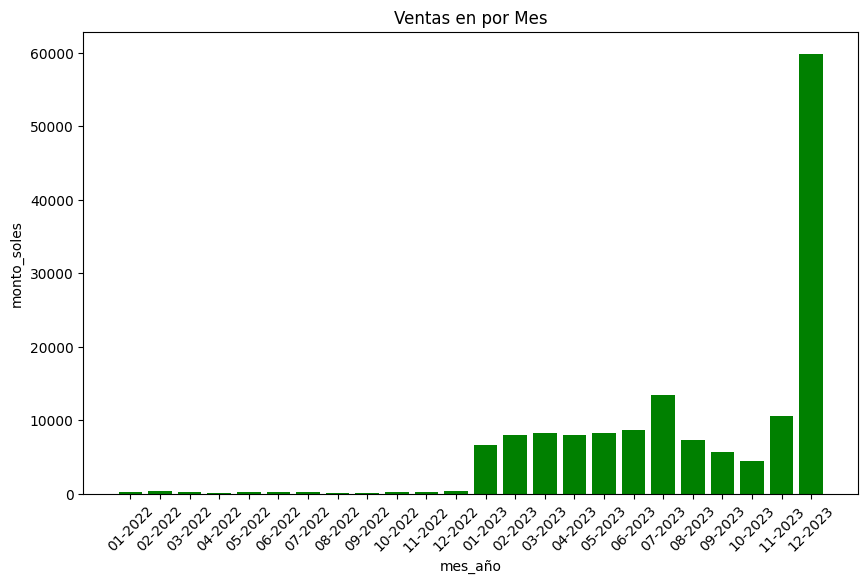

In [85]:
# Calculamos diferentes partes de la fecha
import matplotlib.pyplot as plt
df_ventas_sol['año'] = df_ventas_sol.fecha_comp.dt.year
df_ventas_sol['mes_año'] = df_ventas_sol.fecha_comp.dt.strftime('%m-%Y')
df_ventas_sol['dia_semana'] = df_ventas_sol.fecha_comp.dt.weekday
df_ventas_sol['dia_mes'] = df_ventas_sol.fecha_comp.dt.day



def graficar_barras_ventas(df, x, tooltip, titulo, rotacion_xticks):
    plt.figure(figsize=(10, 6))
    plt.bar(df[x], df[tooltip], color='green')
    plt.xlabel(x)
    plt.ylabel(tooltip)
    plt.title(titulo)
    plt.xticks(rotation=rotacion_xticks)
    plt.show()

# Luego, puedes llamar a esta función con tu DataFrame y las columnas específicas
graficar_barras_ventas(df_ventas_sol, 'mes_año', 'monto_soles', 'Ventas en por Mes', 45)


In [86]:
print(df_ventas_sol.columns)

Index(['fecha_comp', 'monto_soles', 'año', 'mes_año', 'dia_semana', 'dia_mes'], dtype='object')


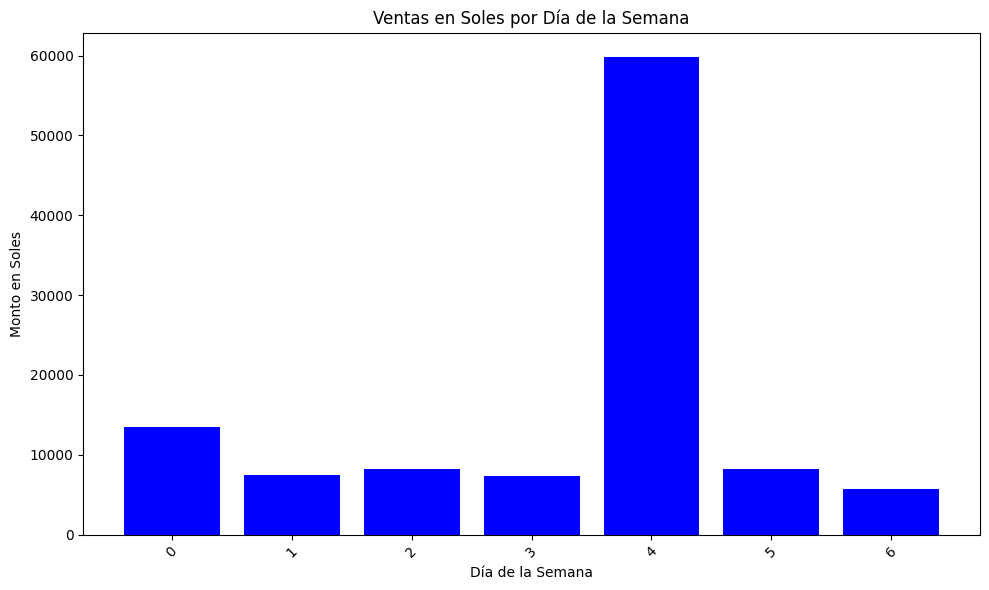

In [106]:
import matplotlib.pyplot as plt

# Configuración de datos
x = df_ventas_sol['dia_semana']
y = df_ventas_sol['monto_soles']

# Configuración del gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='blue')
plt.xlabel('Día de la Semana')
plt.ylabel('Monto en Soles')
plt.title('Ventas en Soles por Día de la Semana')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [108]:
# Convierte la columna 'fecha_comp' a tipo datetime
df_n_fact['fecha_comp'] = pd.to_datetime(df_n_fact['fecha_comp'])

# Extrae el mes y el año de la fecha_comp
df_n_fact['mes'] = df_n_fact['fecha_comp'].dt.month
df_n_fact['año'] = df_n_fact['fecha_comp'].dt.year



<ipython-input-108-76c81abc98c7>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_n_fact['fecha_comp'] = pd.to_datetime(df_n_fact['fecha_comp'])


In [110]:
# Convierte la columna 'fecha_comp' a tipo datetime
df_ventas['fecha_comp'] = pd.to_datetime(df_ventas['fecha_comp'], errors='coerce')

# Filtra las filas donde la conversión ha fallado (NaN)
df_n_fact = df_ventas.loc[~df_ventas['fecha_comp'].isna(), ['fecha_comp', 'fecha', 'num']]

# Extrae el mes y el año de la fecha_comp
df_n_fact['mes'] = df_n_fact['fecha_comp'].dt.month
df_n_fact['año'] = df_n_fact['fecha_comp'].dt.year


<ipython-input-110-7d247b5e780f>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_ventas['fecha_comp'] = pd.to_datetime(df_ventas['fecha_comp'], errors='coerce')


Text(0.5, 0, 'Día de la Semana')

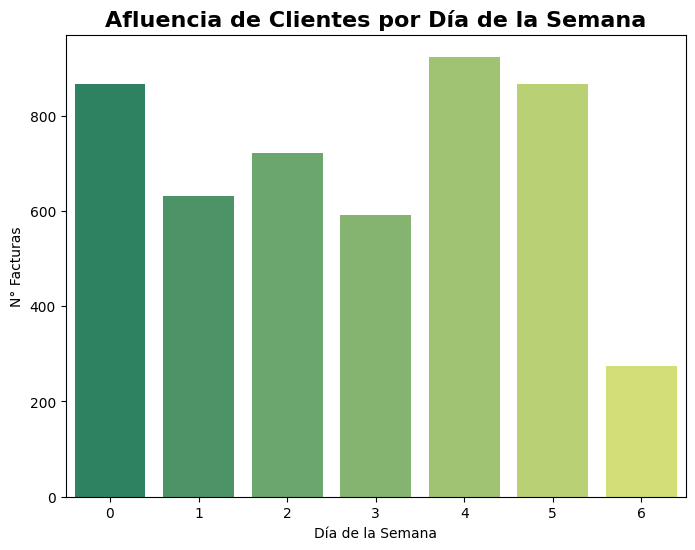

In [111]:
# Utilizamos nunique para contabilizar sólo una vez cada referencia de factura
# Descomponemos la fecha

df_n_fact = df_ventas.loc[:,['fecha_comp', 'fecha', 'num']]

df_n_fact['mes'] = df_n_fact.fecha_comp.dt.month
df_n_fact['año'] = df_n_fact.fecha_comp.dt.year

df_n_fact['dia_semana'] = df_n_fact.fecha_comp.dt.weekday
df_n_fact['dia_mes'] = df_n_fact.fecha_comp.dt.day

df_n_fact['hora'] = df_n_fact.fecha_comp.dt.hour

# N° de facturas para cada día de la semana
df_cl_dias = df_n_fact.pivot_table('num', index='dia_semana', aggfunc={'num':'nunique' })
df_cl_dias = df_cl_dias.reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df_cl_dias, x='dia_semana', y='num', palette='summer')

ax.set_title('Afluencia de Clientes por Día de la Semana', fontsize=16, weight='bold')
ax.set_ylabel('N° Facturas')
ax.set_xlabel('Día de la Semana')

Text(0.5, 0, 'Hora del Día')

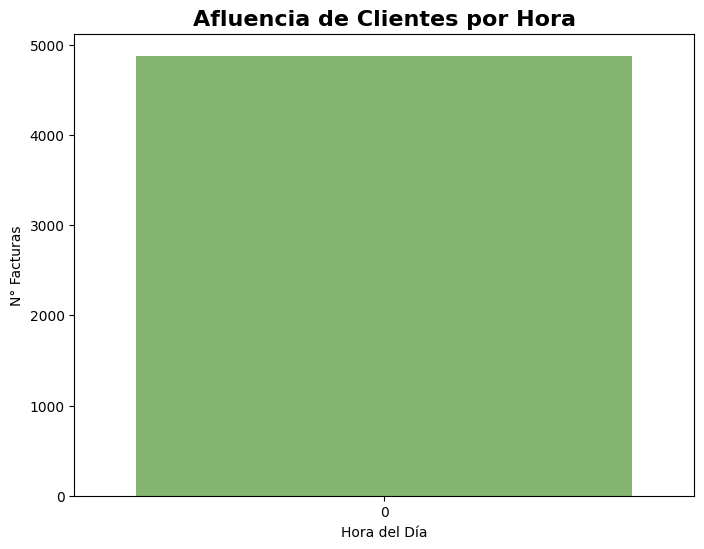

In [112]:
# Horas de más afluencia
df_cl_hora = df_n_fact.pivot_table('num', index='hora', aggfunc={'num':'nunique' })
df_cl_hora = df_cl_hora.reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df_cl_hora, x='hora', y='num', palette='summer')

ax.set_title('Afluencia de Clientes por Hora', fontsize=16, weight='bold')
ax.set_ylabel('N° Facturas')
ax.set_xlabel('Hora del Día')



---

 Definimos la columna rango para seleccionar las 15 líneas con más ventas en $ y/o volumen

<ipython-input-113-002c88e31924>:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_linea_general.monto_dolar = round(df_linea_general.monto_soles, 2)


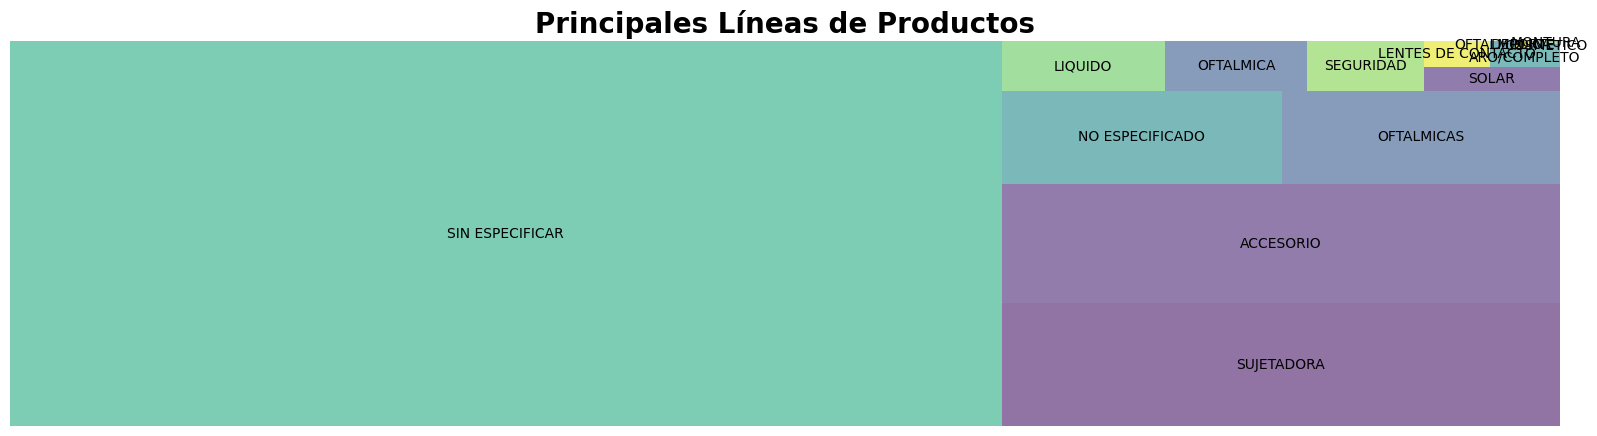

In [113]:
df_linea = df_ventas_linea_prod.copy()
df_linea.dropna(inplace=True)

# Por cada línea de producto: Ventas en volumen (cantidad), N° de productos (producto)
# y total de Ventas en $ (monto_dolar)
df_linea_general = df_linea.pivot_table(index='linea',
                                        aggfunc={'monto_soles':sum,
                                                 'producto':'nunique',
                                                 'cantidad':sum})

# Definimos la columna rango para seleccionar las 15 líneas con más ventas en $ y/o volumen
df_linea_general['rango'] = df_linea_general.cantidad + df_linea_general.monto_soles

df_linea_general.cantidad = round(df_linea_general.cantidad, 2)
df_linea_general.monto_dolar = round(df_linea_general.monto_soles, 2)

df_linea_top_15 = df_linea_general.reset_index().sort_values(['rango'], ascending=False).head(15)

with plt.style.context('seaborn-colorblind'):

    fig, ax = plt.subplots(figsize=(20,5))

    labels = df_linea_top_15['linea']
    sizes = df_linea_top_15['rango']
    squarify.plot(sizes, label=labels, alpha=0.6)

    plt.title('Principales Líneas de Productos',fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.show()


In [146]:
print(df_ventas)


                      num fecha_comp                 cliente  monto tipo  \
0     PC: 00001-000015661 2022-01-19       CLIENTE EVENTUAL    10.0   ve   
1     PC: 00001-000015646 2022-01-14       CLIENTE EVENTUAL    10.0   ve   
2     PC: 00001-000015643 2022-01-14       CLIENTE EVENTUAL    10.0   ve   
3     PC: 00001-000015871 2022-03-14       CLIENTE EVENTUAL    10.0   ve   
4     PC: 00001-000015838 2022-04-03       CLIENTE EVENTUAL    10.0   ve   
...                   ...        ...                     ...    ...  ...   
5331   PC 00005-000051634 2023-08-22     PIERO CHALCO MONTES  475.0   ve   
5332   PC 00005-000051635 2023-08-23  EDUARDO ARANA VIZCARRA  110.0   ve   
5333   PC 00005-000051635 2023-08-23  EDUARDO ARANA VIZCARRA  120.0   ve   
5334   PC 00005-000051636 2023-08-23   RICHARD VIZCARRA MEZA    0.0   ve   
5335   PC 00005-000051636 2023-08-23   RICHARD VIZCARRA MEZA   90.0   ve   

           cod                                           producto  cantidad  \
0     10